In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
table = pd.read_table("results_bm_grad.csv", ",")

/tmp/ipykernel_1021914/1537373060.py:1: FutureWarning: In a future version of pandas all arguments of read_table except for the argument 'filepath_or_buffer' will be keyword-only.
  table = pd.read_table("./results/store_experiments.csv", ",")


In [19]:
total_steps = 70_000
seed = 111
n_flow_layers = 4
n_bijector_layers = 2
activ_fun = 'silu'
proposal = 'prior'
sbi_method  = 'nle'
lr_schedule = 'exp_decay'
nf = 'affine'
bacth_size = 128

exp_nle_70000_100_1_4_2_silu_affine_128_0.0_unmarginal_0.0
exp_nle_70000_100_6_4_2_silu_affine_128_0.0_unmarginal_0.0


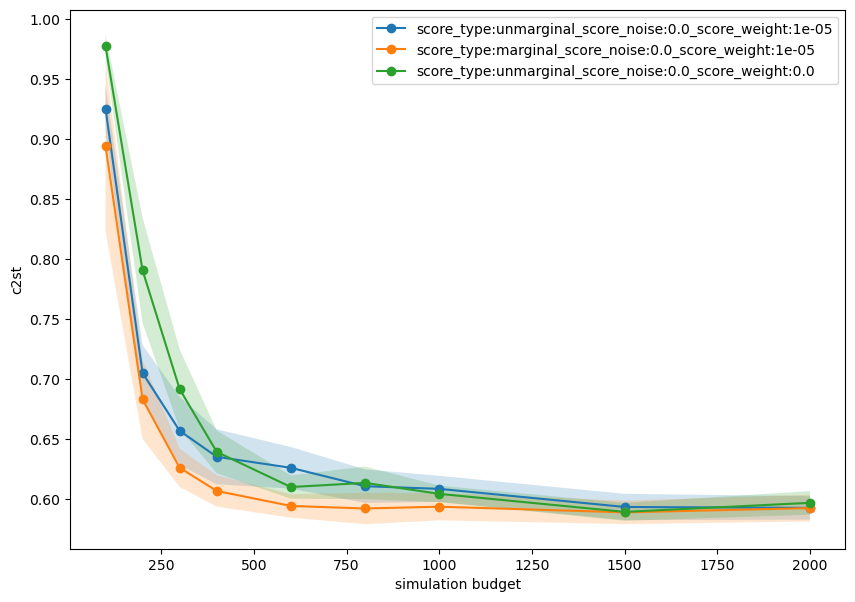

In [20]:
info_setup = [
    ['unmarginal', 0.0, 1e-05],
    ['marginal', 0.0, 1e-05],
    ['unmarginal', 0.0, 0.0]
]


metric_mean = {}
metric_std = {}
sim = {}
for info in info_setup:
    
    score, score_noise, score_weight = info

    store_metric_mean = []
    store_metric_std = []
    store_sim = []

    for nb_simulations_allow in [100,200,300,400,600,800,1000,1500,2000]:
        c2st_store = []
        for seed in [1,2,3,4,5,6,111]:
        
            exp_id = "exp_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}_{}".format(
                sbi_method,
                total_steps,
                nb_simulations_allow,
                seed,
                n_flow_layers,
                n_bijector_layers,
                activ_fun,
                nf,
                bacth_size,
                score_weight,
                score,
                score_noise,
            )

            new_table = table.loc[
                  (table['experiment_id'] == exp_id)
            ]
            
            if len(new_table["c2st"]) != 0:
                c2st = list(new_table["c2st"])[0]
                c2st_store.append(c2st)
            else: 
                print(exp_id)
        
        store_metric_mean.append(jnp.mean(jnp.array(c2st_store)))
        store_metric_std.append(jnp.std(jnp.array(c2st_store)))
        store_sim.append(nb_simulations_allow)

        metric_mean['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)] = store_metric_mean
        metric_std['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)] = store_metric_std
        sim['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)] = store_sim


plt.figure(figsize=(10,7))

for info in info_setup:
    
    score, score_noise, score_weight = info
    mean_y = jnp.array(metric_mean['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)])
    std_y = jnp.array(metric_std['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)])
    axex = jnp.array(sim['score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight)])

    
    plt.plot(
        axex,
        mean_y, 
        label = 'score_type:{}_score_noise:{}_score_weight:{}'.format(score, score_noise, score_weight), 
        marker = 'o'
    )
    plt.fill_between(axex, mean_y + 0.8 * std_y, mean_y - 0.8 * std_y, alpha = 0.2)

plt.xlabel('simulation budget')
plt.ylabel('c2st')
plt.legend()